In [1]:
import numpy as np

states = ['Active', 'At_Risk', 'Churned']

transition_matrix = np.array([
    [0.7, 0.2, 0.1], 
    [0.1, 0.6, 0.3],  
    [0.0, 0.0, 1.0]   
])

def simulate_markov_chain(steps, initial_state):
    current_state = initial_state
    states_visited = [states[current_state]]
    
    for _ in range(steps):
        current_state = np.random.choice([0, 1, 2], p=transition_matrix[current_state])
        states_visited.append(states[current_state])
    
    return states_visited

initial_state = 0  
steps = 10
customer_journey = simulate_markov_chain(steps, initial_state)

print("Customer journey over time:", customer_journey)


Customer journey over time: ['Active', 'Active', 'At_Risk', 'At_Risk', 'Active', 'Active', 'Active', 'Active', 'Active', 'Active', 'At_Risk']


In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

for i in [df.isnull().sum(),df.describe(),df['Churn'].value_counts()]:
    print(i)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [86]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [87]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [88]:
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})
# tried to convert binary columns

df = pd.get_dummies(df, columns=[
    'InternetService', 'Contract', 'PaymentMethod', 'MultipleLines', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies'
], drop_first=True)
# tried to perform one-hot encoding on the specified columns above to create new binary columns for each category

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# handling non-numeric features like 'TotalCharges', using coerce errors will convert non-numeric values to NaN

imputer = SimpleImputer(strategy='median')
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])
# tried to handle missing values by replacing the with median

In [89]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,True,False,False,False,False,False,False,False,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,True,False,False,False,False,False,False
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,True,False,False,False,False,False,False,False,False
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,False,False,False,True,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,False,False


In [90]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')

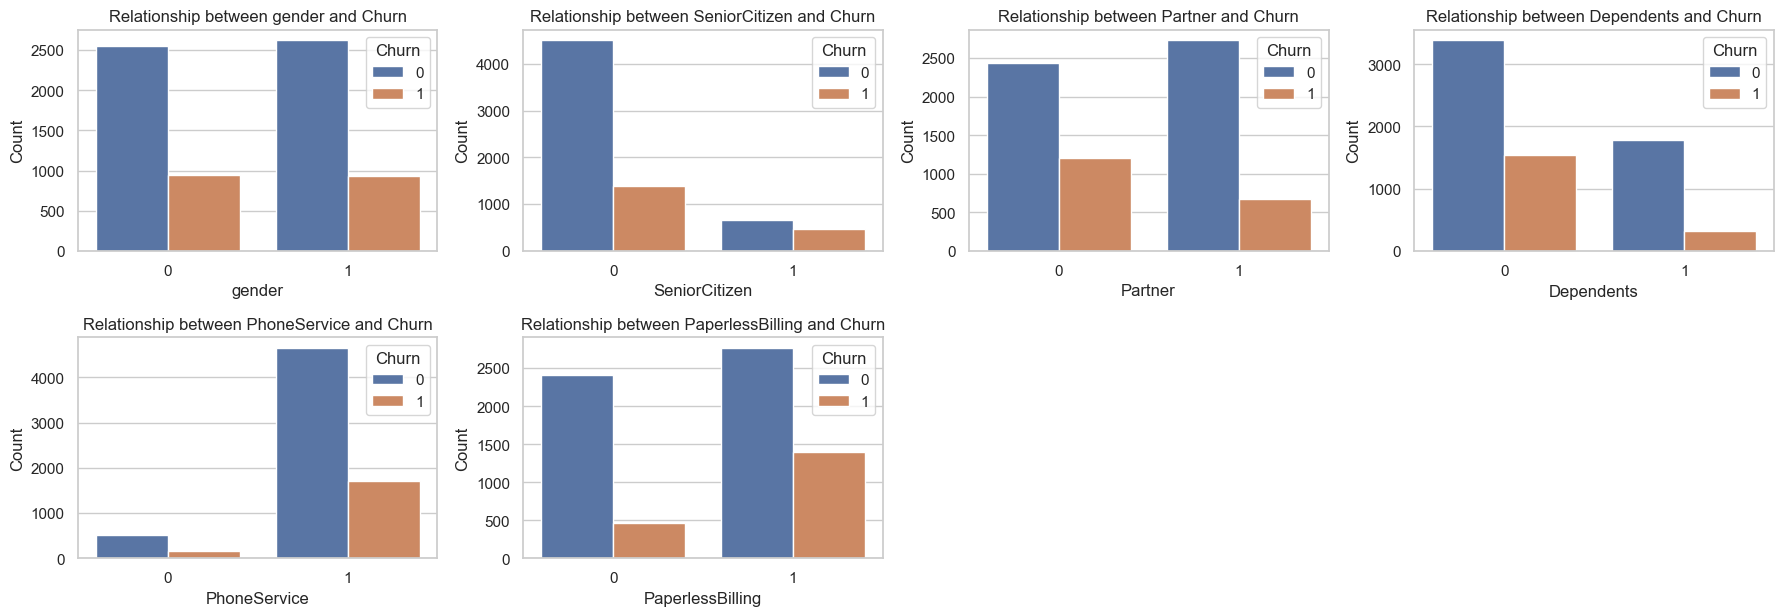

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# List of categorical and numerical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                        'PaperlessBilling', ]

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

ohter_features = ['MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

# Plotting categorical features
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Relationship between {col} and Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')

plt.tight_layout()

plt.savefig('categorical_features_vs_churn.png', dpi=300, bbox_inches='tight')

plt.show()


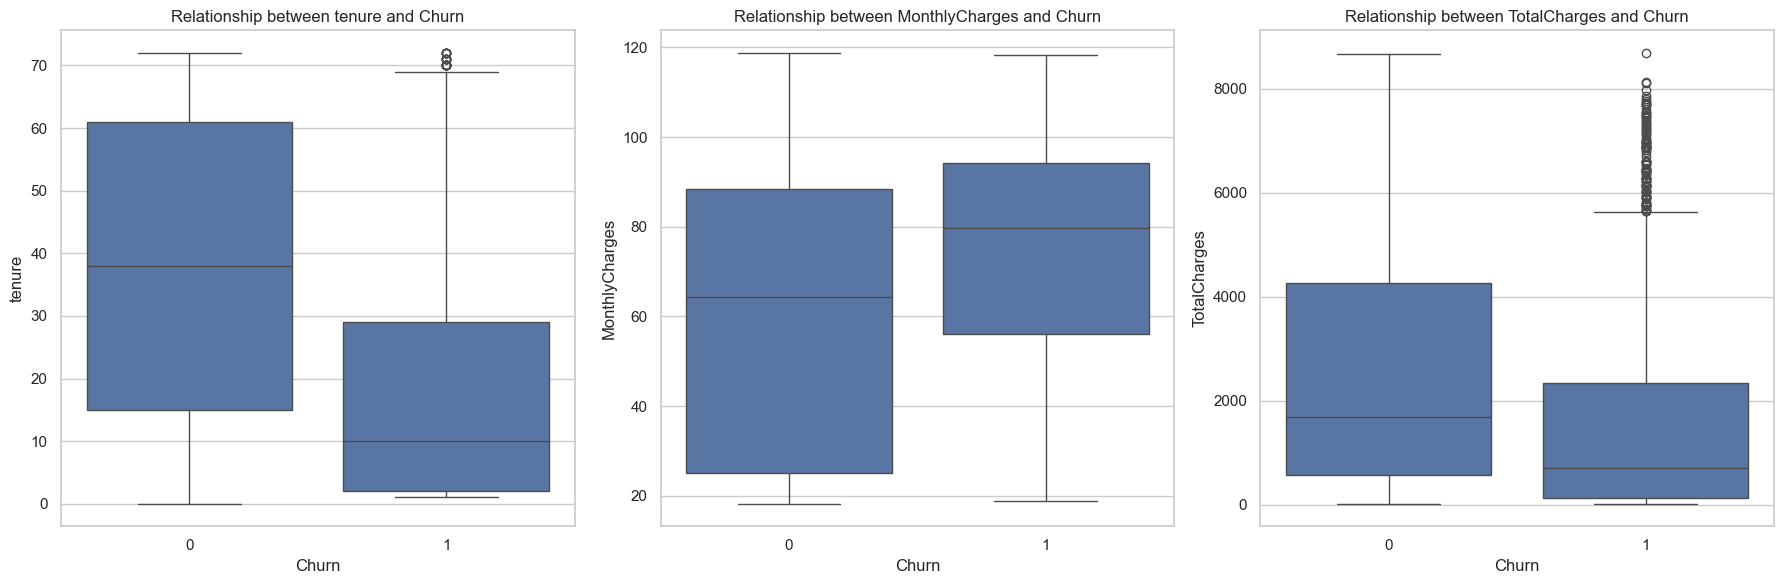

In [100]:
# Plotting numerical features
plt.figure(figsize=(18, 6))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'Relationship between {col} and Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)

plt.tight_layout()
plt.savefig('Numerical_features_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()


In [64]:
for i in [df.isnull().sum(),df.describe(),df['Churn'].value_counts()]:
    print(i)

customerID                               0
gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBacku

In [101]:
df = df.drop(columns=['customerID'])

X = df.drop(columns=['Churn'])
y = df['Churn']
# Separate features and target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Split the data into training and test sets

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Feature scaling

In [102]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
# we start initializing the model

In [103]:
rf_model.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

[[1389  163]
 [ 286  275]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.63      0.49      0.55       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113

Accuracy: 0.7875059157595835


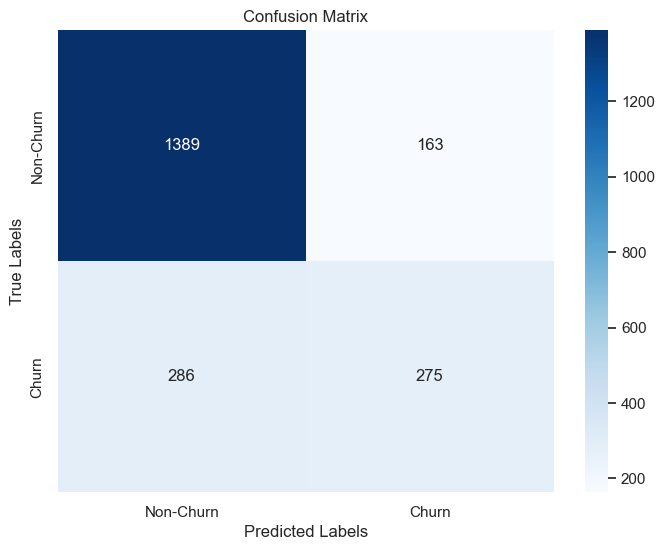

In [104]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### hyperparameter tuning 

In [105]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


[[1404  148]
 [ 285  276]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1552
           1       0.65      0.49      0.56       561

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.80      0.79      2113

Best Model Accuracy: 0.7950780880265026


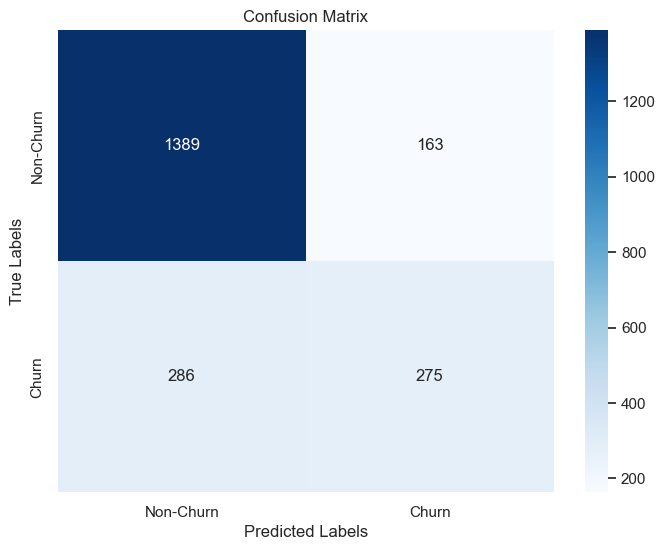

In [106]:
y_pred_best = best_rf_model.predict(X_test)
# Predict churn on the test set

print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print(f"Best Model Accuracy: {accuracy_score(y_test, y_pred_best)}")
# Evaluate the best model

cm1 = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### deployment 

In [ ]:
import pickle

with open('rf_churn_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('rf_churn_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

new_customer = np.array([[1, 0, 1, 0, 29.85, 29.85, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
new_customer_scaled = loaded_scaler.transform(new_customer)
prediction = loaded_model.predict(new_customer_scaled)
# Example of using the model to predict churn for a new customer

print("Churn prediction:", "Yes" if prediction[0] == 1 else "No")


### logistic regression 

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

log_reg = LogisticRegression(random_state=42, max_iter=1000)

log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [108]:
y_pred = log_reg.predict(X_test)

y_prob = log_reg.predict_proba(X_test)[:, 1]


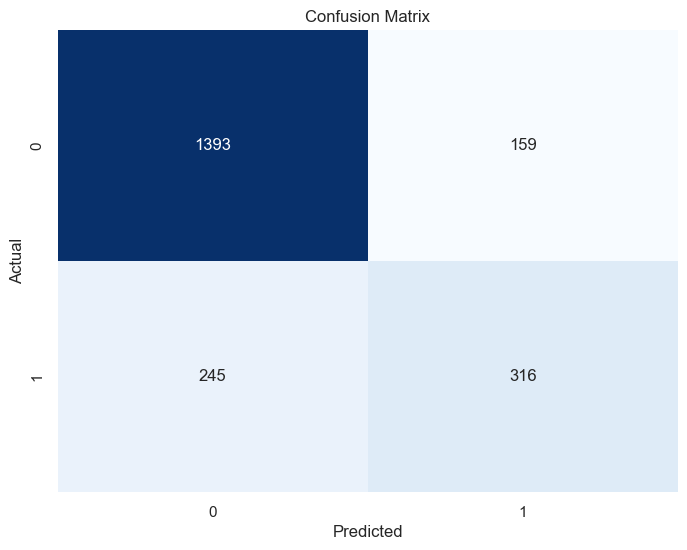

In [109]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [110]:
class_report = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])
print("Classification Report:\n", class_report)
# a brief report on the classification for insight

Classification Report:
               precision    recall  f1-score   support

    No Churn       0.85      0.90      0.87      1552
       Churn       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



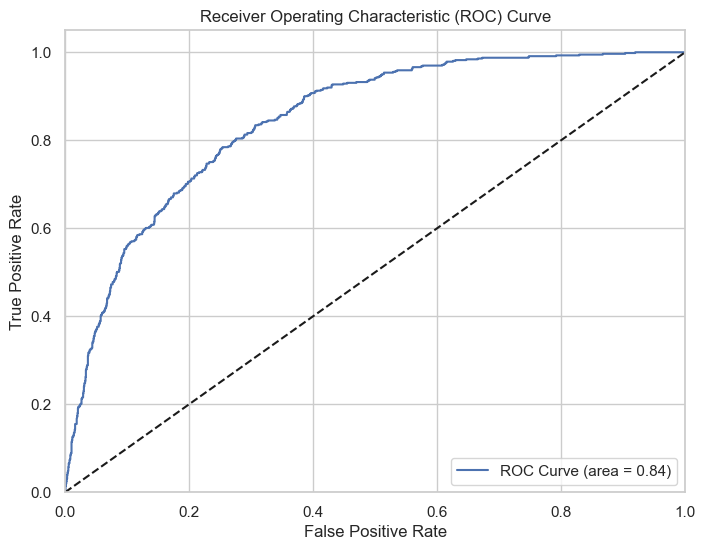

In [112]:
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.savefig('roc_curve.png', dpi=300)

plt.show()
# ROC-AUC Score and Curve

In [113]:
coefficients = pd.DataFrame(log_reg.coef_[0], X.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))

                                       Coefficient
TotalCharges                              0.628401
InternetService_Fiber optic               0.627929
StreamingMovies_Yes                       0.238269
PaperlessBilling                          0.201297
MultipleLines_Yes                         0.196873
StreamingTV_Yes                           0.192342
PaymentMethod_Electronic check            0.179059
SeniorCitizen                             0.052227
PaymentMethod_Mailed check                0.040217
DeviceProtection_Yes                      0.025053
gender                                    0.013511
PhoneService                              0.000929
MultipleLines_No phone service           -0.000929
Partner                                  -0.003025
PaymentMethod_Credit card (automatic)    -0.014198
OnlineBackup_Yes                         -0.036395
StreamingTV_No internet service          -0.089290
OnlineSecurity_No internet service       -0.089290
InternetService_No             

### hyperparameter tuning 

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])
# Creating a pipeline to standardize the data and then apply logistic regression

param_grid = [
    {
        'logreg__penalty': ['l1', 'l2'],  # L1 and L2 penalties
        'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'logreg__solver': ['liblinear', 'saga'],  # Liblinear supports L1 and L2
    },
    {
        'logreg__penalty': ['elasticnet'],  # ElasticNet penalty
        'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'logreg__solver': ['saga'],  # Only saga supports ElasticNet
        'logreg__l1_ratio': [0.2, 0.5, 0.8]  # l1_ratio for ElasticNet
    }
]

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, error_score='raise')
grid_search.fit(X_train, y_train)
# Performming grid search with cross-validation

print(f"Best parameters: {grid_search.best_params_}")
# Getting the best parameters

# Best model
best_lr_model = grid_search.best_estimator_

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best parameters: {'logreg__C': 0.1, 'logreg__l1_ratio': 0.8, 'logreg__penalty': 'elasticnet', 'logreg__solver': 'saga'}


[[1398  154]
 [ 255  306]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113

Best Model Accuracy: 0.8064363464268812


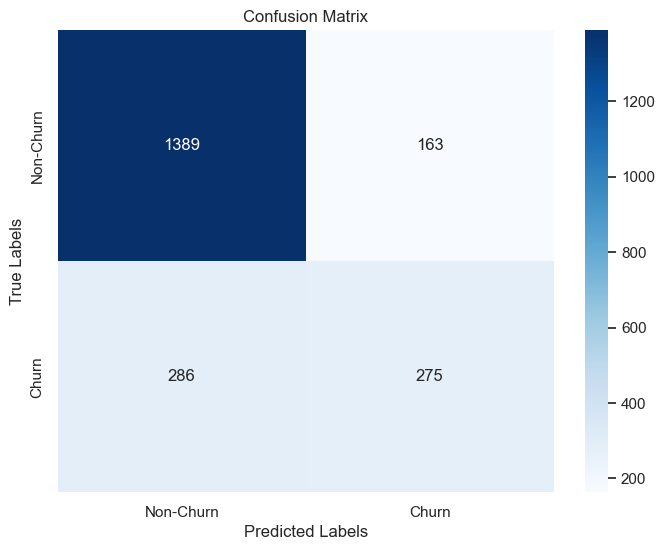

In [117]:
y_pred_best = best_lr_model.predict(X_test)
# Predict churn on the test set

print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print(f"Best Model Accuracy: {accuracy_score(y_test, y_pred_best)}")
# Evaluate the best model

cm1 = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### deployment 

In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

model_filename = 'logistic_regression_model.pkl'
model = joblib.load(model_filename)

app = Flask(__name__)

@app.route('/')
def home():
    return "Logistic Regression Model API"

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)

    features = np.array(data['data']).reshape(1, -1)

    prediction = model.predict(features)
    probability = model.predict_proba(features).max()

    return jsonify({
        'prediction': int(prediction[0]),  # Convert NumPy int to native Python int
        'probability': float(probability)  # Convert NumPy float to native Python float
    })

if __name__ == '__main__':
    app.run(debug=True)

### XGBoost 

In [118]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 4.8 MB/s eta 0:00:27
    --------------------------------------- 1.8/124.9 MB 4.6 MB/s eta 0:00:27
    --------------------------------------- 2.9/124.9 MB 4.7 MB/s eta 0:00:27
   - -------------------------------------- 3.7/124.9 MB 4.6 MB/s eta 0:00:27
   - -------------------------------------- 4.5/124.9 MB 4.3 MB/s eta 0:00:28
   - -------------------------------------- 5.5/124.9 MB 4.7 MB/s eta 0:00:26
   -- ------------------------------------- 6.6/124.9 MB 4.6 MB/s eta 0:00:26
   -- ------------------------------------- 7.6/124.9 MB 4.7 MB/s eta 0:00:26
   -- ------------------------------------- 8.4/124.9 MB 4.7 MB/s eta 0:00:25
   --- ------------------------------------ 9.4/124.9 MB 4.7 MB/s eta 0:00:25
   --- ------------------------------------ 10.2/124.9 MB 4.7 MB/s eta 0:00:25
   --- ------------------------------------ 11.3/124.9 MB 4.7 MB/s eta

Fitting 5 folds for each of 50 candidates, totalling 250 fits


D:\Users\gyamfi\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:158: UserWarning: [02:43:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 0.8, 'reg_lambda': 1.0, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 1.0}
Accuracy: 0.7993
AUC-ROC: 0.8434
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.66      0.52      0.58       561

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



<Figure size 1000x800 with 0 Axes>

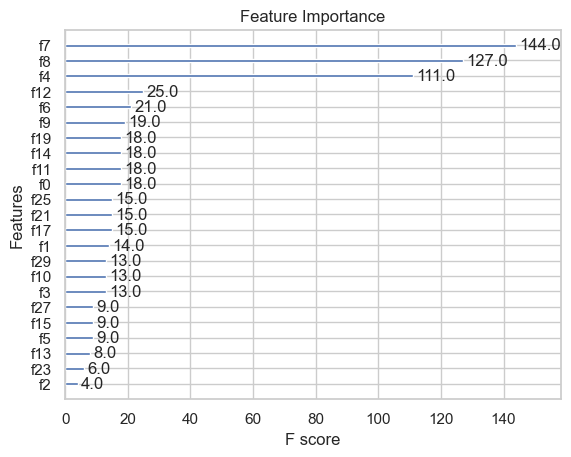

In [120]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', use_label_encoder=False)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 1.0],   # L1 regularization
    'reg_lambda': [1.0, 0.1, 0]   # L2 regularization
}


random_search = RandomizedSearchCV(estimator=xgb_model, 
                                   param_distributions=param_grid, 
                                   n_iter=50, 
                                   cv=5, 
                                   verbose=2, 
                                   random_state=42, 
                                   n_jobs=-1, 
                                   scoring='roc_auc')

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_xgb_model = random_search.best_estimator_

print(f"Best parameters: {best_params}")

y_pred = best_xgb_model.predict(X_test)
y_proba = best_xgb_model.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
# comparing the predicted verse actual to get accuracy

roc_auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC: {roc_auc:.4f}")
# Calculating the AUC-ROC

print("Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10,8))
xgb.plot_importance(best_xgb_model)
plt.title('Feature Importance')

plt.savefig('xgboost_feature_importance.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
Random Forest, Logistic Regression, XGBoost